## **Dataset Preparation**
To be able to train our custom dataset with YOLOv4, we need to prepare our dataset into YOLO format. 
  

*   Each image from the dataset would associated with a txt file having the same name.
*   The txt file should have the same name of the image and  contains the object classes and their coordinate following this syntax: <object-class> <x_center> <y_center> <width> <height>
* In case there is no object in the image we can create a txt file with the same name without any values inside it.

## **Setting up files for YOLOV4**



Download the YoloV4 friles from the below link.
 * Link:*https://github.com/AlexeyAB/darknet*
 * After downloading extract the file in to your local machine.
Now we need to make changes to the following files based on the custom data we want to Train.

*   **Configuration file**: 
Open darknet-master folder which we have just downloaded. In the cfg folder make 2 copies of the file yolo4-custom.cfg and rename the copy file to yolo-Train.cfg and yolo-Test.cfg
  * batch=64 (number of samples in one batch), subdivisions=16 (number of mini_batches in one batch) for test.cfg the values to be maintained as batch =1 and subdivisions =1.
  * open the cfg file cfg and change max_batches to (classes*2000) 4000,if you have 6 object classes change max_batches=12000. in case of 1 class then change it to 4000.
  * Then change the line steps to (0.8*max_batches ,0.9*max_batches) 
  * set network size width=416 height=416
  * change line (end layers) classes=80 to your number of objects in each of 3 yolo layers.
  * change [filters=255] to filters=(classes + 5)x3 in the 3 convolutional layer immediately before each 3 yolo layers.

**Pretrained Weights**: 
  * Download the pre trained weights from the link yolov4.conv.137 and save it in the darknet-master folder

**Prepare Names File**: 
  * Open wordpad and type the name of each object in separate lines and save the file as obj.names in darknet-master->data folder
  * Make sure that the index of your <object-class> from label file.txt is corresponded to the index of your classes name, e.g, <object-class> of object1_name, object2_name, object3_name are 0, 1, 2 respectively.

In [ ]:
# object1_name
# object2_name
# object3_name
# ...
# objectn_name

**Prepare Train file and Validation file**: 
  * Create the Train and test file which contains the file path to all training images and testing images.
  * Example: add ‘data/obj/’ to each line of the image file names to get the path. The train.txt and test.txt files are stored in the darknet-master->data folder.

In [ ]:
# data/obj/img1.jpg
# data/obj/img2.jpg
# data/obj/img3.jpg
# data/obj/img4.jpg


**Prepare Data File**: 
  * Create file obj.data in the folder darknet-master->data, containing the given text (replace classes = number of objects)


In [ ]:
    # classes= 6
    # train  = data/train.txt
    # names = data/obj.names
    # backup = backup/ 

**Prepare Makefile**:
  * In the darknet-master folder open Makefile in wordpad and change GPU=1,CUDNN=1,OPENCV=1 as shown in the following picture.This is done to make the training on GPU.


In [ ]:
# GPU=1
# CUDNN=1
# CUDNN_HALF=0
# OPENCV=1
# AVX=0
# OPENMP=0
# LIBSO=0
# ZED_CAMERA=0 # ZED SDK 3.0 and above
# ZED_CAMERA_v2_8=0 # ZED SDK 2.X


## Once the files are ready upload the files to Google Drive before following the Next Step

## Mounting the google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Changing the current directory to darknet-master

In [ ]:
%cd "/content/drive/My Drive/Colab_Notebooks/Capstone/darknet-master"

/content/drive/My Drive/Colab_Notebooks/Capstone/darknet-master


## Compiling darknet

In [ ]:
!make
!chmod +x ./darknet

chmod +x *.sh


## Converted certain files to unix so that we can execute the following codes

In [ ]:
!sudo apt install dos2unix

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  dos2unix
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 351 kB of archives.
After this operation, 1,267 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 dos2unix amd64 7.3.4-3 [351 kB]
Fetched 351 kB in 1s (362 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package dos2unix.
(Reading database ... 144676 files and directories curren

In [ ]:
!dos2unix ./data/train.txt
!dos2unix ./data/obj.data
!dos2unix ./data/obj.names
!dos2unix ./cfg/yolo-obj.cfg

dos2unix: converting file ./data/train.txt to Unix format...
dos2unix: converting file ./data/obj.data to Unix format...
dos2unix: converting file ./data/obj.names to Unix format...
dos2unix: converting file ./cfg/yolo-obj.cfg to Unix format...


## Training the data

Trained the training data using the model defined in the yolo-obj configuration file, obj.data file and pretrained weights from yolov4.conv.137.

In [ ]:
# ! ./darknet detector train data/obj.data cfg/yolo-obj.cfg yolov4.conv.137 -dont_show

If we have stopped the training at a particular point we can restart training from there by using following code with latest weights saved in the Backup folder.

In [ ]:
# !./darknet detector train data/obj.data cfg/yolo-obj.cfg backup/yolo-obj_4000.weights -dont_show

## Testing the data
For testing we have used the following code, where we have passed the yolo-obj configuration file,obj.data file and the final weights we got after the training the model and then enter the path of images we want to test. The results will be stored as a image named predictions.jpg

In [ ]:
!./darknet detector test data/obj.data cfg/yolo-obj-test.cfg backup/yolo-obj_4000.weights "/content/drive/My Drive/Colab_Notebooks/Capstone/02776139a.jpg"

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x

## Visualization
Visualising the detected ship and its bounding box for an image from test data set.

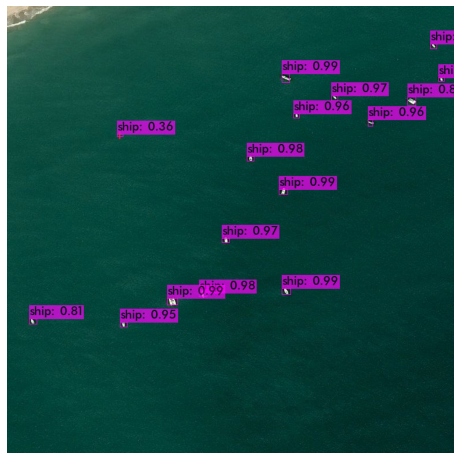

In [ ]:
import cv2
import matplotlib.pyplot as plt

def imShow(path):

  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(width, height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(8, 15)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

imShow('/content/drive/My Drive/Colab_Notebooks/Capstone/darknet-master/predictions.jpg')